# Magnetic and Diagenetic Analyses of Reilly (2016)
_____

Paper doi: https://doi.org/10.1002/2016GC006627

Core: NBP10-01 JKC-55, JPC-127 (65°45.4′S, 64°45.6′W)

Water depth: 652 m

Data in analysis: Magnetite ppm (from Ms measurements), sedimentation rate, total organic carbon.

Age model paper: https://doi.org/10.1130/B31035.1

"Outer Bay" includes cores JKC-55 and JPC-127, which are close to each other. The mid-bay core JPC-126 is plotted in a separate file.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_fns
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data
magn = pd.read_excel("data/reilly2016/reilly2016-outer.xlsx", sheet_name="Ms")
toc = pd.read_excel("data/reilly2016/reilly2016-outer.xlsx", sheet_name="toc")
ages = pd.read_excel("data/reilly2016/reilly2016-outer.xlsx", sheet_name="ages")

# correct depths from cm to m, Ms to magnetite, years BP to Ma
magn["Depth [mbsf]"] = magn["Composite Depth (cmcd)"] / 100
magn["Magnetite [ppm]"] = (magn["Ms (Am2/kg)"] * 10**6) / 92
toc["Depth [mbsf]"] = toc["Depth (cm)"] / 100
ages["Depth [mbsf]"] = ages["Depth (cm)"] / 100
ages["Age [Ma]"] = ages["Calib. Age [yr BP 2010]"] / 1000000

In [3]:
sed_rates = data_fns.sed_rates(ages["Age [Ma]"], ages["Depth [mbsf]"])

In [4]:
# combine stuff together
magn_df = pd.DataFrame({"Depth [mbsf]":magn["Depth [mbsf]"], "Magnetite [ppm]":magn["Magnetite [ppm]"]})
toc_df = pd.DataFrame({"Depth [mbsf]":toc["Depth [mbsf]"], "TOC [wt. %]":toc["TOC (wt. %)"]})
seds_df = pd.DataFrame({"Depth [mbsf]":ages["Depth [mbsf]"], "Sedimentation Rate [m/Myr]":sed_rates})

comb_df = pd.concat([magn_df, toc_df, seds_df]).sort_values(by="Depth [mbsf]").reset_index(drop=True)

In [5]:
# interpolate
interpolated = data_fns.interpolate(comb_df, ["TOC [wt. %]"], fill_final_rates=False)

# TOC data only goes to bottom of KC, so let's cut it off below 4.3m (which is 10 cm below final point)
interpolated.loc[523:,"TOC [wt. %]"] = np.nan

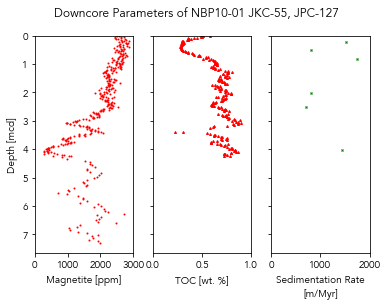

In [6]:
# downcore plots
colors = ["r", "r", "g", "k"]
markers = [".", "^", "x", "<"]
comp_markers = [".", ".", ".", "."]
dc_fig, dc_axs = data_fns.plot_dc(["Magnetite [ppm]", "TOC [wt. %]", "Sedimentation Rate [m/Myr]"], comb_df, colors, markers)
dc_fig.suptitle("Downcore Parameters of NBP10-01 JKC-55, JPC-127", x=0.5)
dc_axs[0].set_ylabel("Depth [mcd]")
dc_axs[2].set_xlabel("Sedimentation Rate\n[m/Myr]")
dc_axs[0].set_xlim(0,3000)
dc_axs[1].set_xlim(0,1)
dc_axs[2].set_xlim(0,2000)
dc_fig.savefig("outputs/reilly2016/outer-bay/dc2-aug23.pdf", bbox_inches="tight")

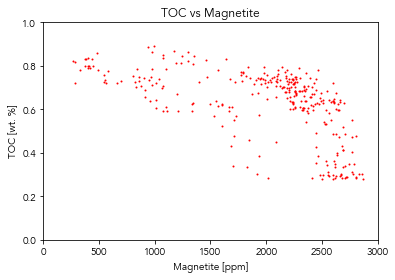

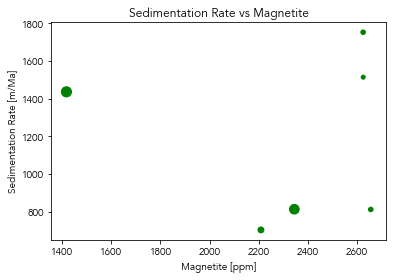

In [10]:
# comparison plots
comp_figs, comp_axs = data_fns.plot_comp(["TOC [wt. %]"], interpolated, ["r", "k"], comp_markers)
comp_axs[0].set(xlabel="Magnetite [ppm]", ylabel="TOC [wt. %]", title="TOC vs Magnetite", ylim=[0,1], xlim=[0,3000])
comp_figs[0].savefig("outputs/reilly2016/outer-bay/toc-comp.pdf")


# plot the sed rate comp plot separately, since it has a different presentation
sed_fig, sed_ax, sed_sc = data_fns.sed_avg_plot(interpolated)
sed_ax.set(xlabel="Magnetite [ppm]", ylabel="Sedimentation Rate [m/Myr]", title = "Sedimentation Rate vs Magnetite")
sed_fig.savefig("outputs/reilly2016/outer-bay/sed-comp.pdf")

In [11]:
# write data to compilations
# first we have to rename the depth columns to mcd instead of mbsf
# we used mbsf above b/c it works nicely with data_fns.py
comb_df.rename(columns={"Depth [mbsf]":"Depth [mcd]"}, inplace=True)
interpolated.rename(columns={"Depth [mbsf]":"Depth [mcd]"}, inplace=True)

In [12]:
data_fns.write_output(comb_df, "NBP10-01 JKC-55, JPC-127", "data/comp_raw.xlsx")
data_fns.write_output(interpolated, "NBP10-01 JKC-55, JPC-127", "data/comp_inter.xlsx")

